## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn import metrics

In [2]:
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [3]:
# obliczanie odległości między punktami
def edist(p1, p2, features):
    a=[]
    b=[]
    for i in features:
        a.append(p1[i])
        b.append(p2[i])
    c=0
    for i in range(len(features)):
        c += (a[i]-b[i])**2
    return c**(1/2) 

In [4]:
# wybór klas
def choose_classes(classes):
    for i in range(len(classes)):
        if i == 0:
            c_train = np.array(train[train[:,0] == classes[i]])
            c_test = np.array(test[test[:,0] == classes[i]])
        else:
            c_train = np.vstack((c_train,train[train[:,0] == classes[i]]))
            c_test = np.vstack((c_test,test[test[:,0] == classes[i]]))
    return c_train, c_test

In [5]:
def centeroid(arr):
    ans =[]
    length = arr.shape[0]
    for i in range(arr.shape[1]):
        suma  = np.sum(arr[:,i])
        ans.append(suma/length)
    return ans


In [6]:
# klasyfikator nm
def centers(train,classes):
    centers =[]
    for i, c in enumerate(classes):
        center = train[train[:,0] == c]
        centers.append(centeroid(center))
    centers = np.array(centers)
    return centers
    
def nM(train, test, features, centers, dist=0):
    classified = np.copy(test)
    # centers zawiera wartość średnią z każdego parametru

    for te in range(len(test)):
        nearest = 100
        for tr in range (len(centers)):
            if dist == 0:
                distance = edist(test[te], centers[tr], features)
            if distance < nearest:
                nearest = distance
                classified[te,0] = centers[tr,0]
    
    return classified

In [7]:
def acc(classified,test):
    correct = (test[:,0] == classified[:,0])
    correct = np.count_nonzero(correct)
    return correct/len(classified)

In [8]:
features = [4,8]
# classes=[1,2,3,4,5,6,7,8,9,10]
classes = [5,8]

# tworzenie podzbiorów dla wybranych klas
new_train, new_test = choose_classes(classes)

centers = centers(new_train, classes)
classified = nM(new_train, new_test, features, centers)

print(f'Accuracy dla klasyfikacji na podstawie cech 4 i 8: {acc(classified, new_test): .1%}')

Accuracy dla klasyfikacji na podstawie cech 4 i 8:  100.0%


Accuracy dla klasyfikacji na podstawie cech 4 i 8 dla 5 klas:  100.0%


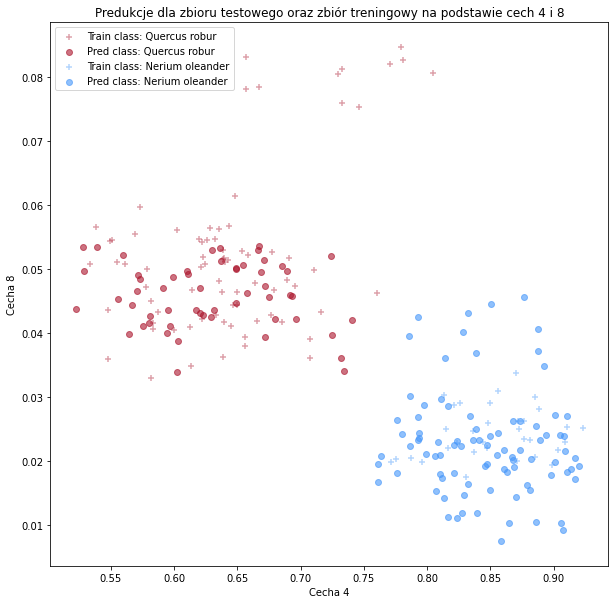

In [9]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
color = []
for i in range(41):
    color.append((random.randint(0,100)/100,random.randint(0,100)/100,random.randint(0,100)/100))

nazwy = {3: 'Populus nigra',
         5: 'Quercus robur',
         8: 'Nerium oleander',
         10:'Tilia tomentosa',
         13:'Corylus avellana'} 

plt.rcParams["figure.figsize"] = (10,10)

plt.title("Predukcje dla zbioru testowego oraz zbiór treningowy na podstawie cech 4 i 8")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")


for cl in classes:
    plt.scatter(x=new_train[new_train[:,0] == cl][:,features[0]],
                y=new_train[new_train[:,0] == cl][:,features[1]],
                label='Train class: '+nazwy[cl],
                marker ='+',
                c = color[cl],
                alpha=0.4)
    
    plt.scatter(x=classified[classified[:,0] == cl][:,features[0]],
                y=classified[classified[:,0] == cl][:,features[1]],
                label='Pred class: '+nazwy[cl],
                c = color[cl],
                alpha=0.6)
    
    
plt.legend()

print(f'Accuracy dla klasyfikacji na podstawie cech 4 i 8 dla 5 klas: {acc(classified, new_test): .1%}')

### NM machalanobis

* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

In [10]:
def my_cov(arr):
    return (1/(len(arr)-1))*(arr-arr.mean(axis=0)).T@(arr-arr.mean(axis=0))

In [11]:
classes = [4]
class4_tr, class4_te = choose_classes(classes)
np.cov(class4_tr[:,[4,8,9]].T)

array([[6.67206679e-03, 9.25741351e-05, 1.23178271e-03],
       [9.25741351e-05, 3.26413475e-05, 8.80676366e-05],
       [1.23178271e-03, 8.80676366e-05, 2.56878682e-03]])

In [12]:
my_cov(class4_tr[:,[4,8,9]])

array([[6.67206679e-03, 9.25741351e-05, 1.23178271e-03],
       [9.25741351e-05, 3.26413475e-05, 8.80676366e-05],
       [1.23178271e-03, 8.80676366e-05, 2.56878682e-03]])

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.


In [13]:
x = class4_te[1]
x[[4,8]]

array([0.17039 , 0.011761])

In [14]:
np.sqrt(
    (x[[4,8]]-class4_te[:,[4,8]].mean(axis=0)).T @ 
    np.linalg.pinv(my_cov(class4_tr[:,[4,8]])) @
    (x[[4,8]]-class4_te[:,[4,8]].mean(axis=0))
)

1.2277735783303214

In [15]:
np.sqrt(
    (x[[4,8]]-x[[4,8]].mean(axis=0)).T @ 
    np.linalg.pinv(my_cov(class4_tr[:,[4,8]])) @
    (x[[4,8]]-x[[4,8]].mean(axis=0))
)

14.3933198260857

In [16]:
def m_dist(x, arr,features):
    return np.sqrt(
    (x[features]-arr[:,features].mean(axis=0)).T @ 
    np.linalg.pinv(my_cov(class4_tr[:,features])) @
    (x[features]-arr[:,features].mean(axis=0))
)

In [17]:
m_dist(x,class4_te, [4,8])

1.2277735783303214

In [18]:
def nM_mach(train, test, features, classes):
    classified = np.copy(test)
    for te in range(len(test)):

        nearest = 100
        for tr in range(len(classes)):
            trcl  = np.array(train[train[:,0] == classes[tr]])
            distance = m_dist(test[te],trcl, features)
            if distance < nearest:
                nearest = distance

                classified[te,0] = trcl[0][0]
    
    return classified

In [19]:
features = [4,8]
# classes=[1,2,3,4,5,6,7,8,9,10]
classes = [5,8]

# tworzenie podzbiorów dla wybranych klas
new_train, new_test = choose_classes(classes)

classified = nM_mach(new_train, new_test, features, classes)

print(f'Accuracy dla klasyfikacji na podstawie cech 4 i 8: {acc(classified, new_test): .1%}')

Accuracy dla klasyfikacji na podstawie cech 4 i 8:  95.8%


Accuracy dla klasyfikacji na podstawie cech 4 i 8 dla 5 klas:  95.8%


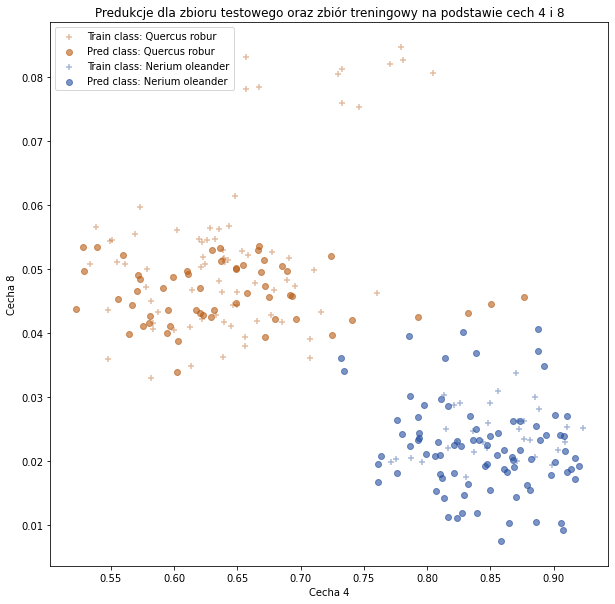

In [20]:

color = []
for i in range(41):
    color.append((random.randint(0,100)/100,random.randint(0,100)/100,random.randint(0,100)/100))

nazwy = {3: 'Populus nigra',
         5: 'Quercus robur',
         8: 'Nerium oleander',
         10:'Tilia tomentosa',
         13:'Corylus avellana'} 

plt.rcParams["figure.figsize"] = (10,10)

plt.title("Predukcje dla zbioru testowego oraz zbiór treningowy na podstawie cech 4 i 8")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")


for cl in classes:
    plt.scatter(x=new_train[new_train[:,0] == cl][:,features[0]],
                y=new_train[new_train[:,0] == cl][:,features[1]],
                label='Train class: '+nazwy[cl],
                marker ='+',
                c = color[cl],
                alpha=0.4)
    
    plt.scatter(x=classified[classified[:,0] == cl][:,features[0]],
                y=classified[classified[:,0] == cl][:,features[1]],
                label='Pred class: '+nazwy[cl],
                c = color[cl],
                alpha=0.6)
    
    
plt.legend()

print(f'Accuracy dla klasyfikacji na podstawie cech 4 i 8 dla 5 klas: {acc(classified, new_test): .1%}')

### Poprównanie

In [21]:
def kNN(train, test, features, n):
    classified = np.copy(test)
    for te in range(test.shape[0]):
        distances = np.full((train.shape[0], 2),100.)
        for tr in range(train.shape[0]):
            dist = edist(test[te], train[tr], features)
            distances[tr,0] = dist
            distances[tr,1] = train[tr,0]
        distances = distances[distances[:,0].argsort()]
        x = stats.mode(distances[0:n,1])
        classified[te,0] = x[0][0]
            
    return classified

In [77]:
def centers(train,classes):
    centers =[]
    for i, c in enumerate(classes):
        center = train[train[:,0] == c]
        centers.append(centeroid(center))
    centers = np.array(centers)
    return centers

features = [4,8]
# classes=[1,2,3,4,5,6,7,8,9,10]
# classes = [3,5,8,10,13]
classes = [5,10,3]

# tworzenie podzbiorów dla wybranych klas
new_train, new_test = choose_classes(classes)

classified_mach = nM_mach(new_train, new_test, features, classes)

print(f'Accuracy dla klasyfikacji nm euc na podstawie cech 4 i 8: {acc(classified_mach, new_test): .1%}')

centers = centers(new_train, classes)
classified_euc = nM(new_train, new_test, features, centers)
print(f'Accuracy dla klasyfikacji nm mach na podstawie cech 4 i 8: {acc(classified_euc, new_test): .1%}')

classified_knn3 = kNN(new_train, new_test, features, 3)
print(f'Accuracy dla klasyfikacji knn3 na podstawie cech 4 i 8: {acc(classified_knn3, new_test): .1%}')

classified_knn5 = kNN(new_train, new_test, features, 5)
print(f'Accuracy dla klasyfikacji knn3 na podstawie cech 4 i 8: {acc(classified_knn5, new_test): .1%}')

Accuracy dla klasyfikacji nm euc na podstawie cech 4 i 8:  92.1%
Accuracy dla klasyfikacji nm mach na podstawie cech 4 i 8:  92.7%
Accuracy dla klasyfikacji knn3 na podstawie cech 4 i 8:  95.8%
Accuracy dla klasyfikacji knn3 na podstawie cech 4 i 8:  97.0%


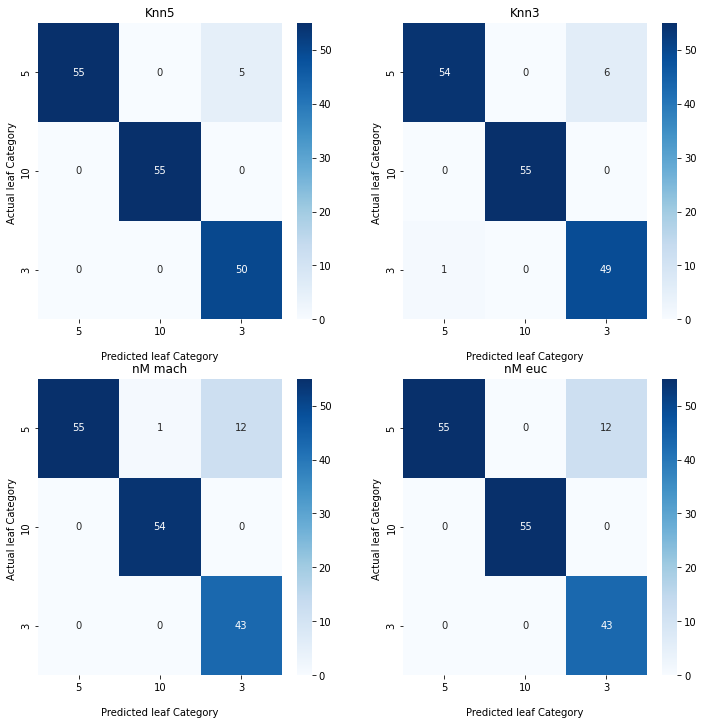

In [78]:
import seaborn as sns
cme = metrics.confusion_matrix(classified_euc[:,0], new_test[:,0])
cmm = metrics.confusion_matrix(classified_mach[:,0], new_test[:,0])
cm3 = metrics.confusion_matrix(classified_knn3[:,0], new_test[:,0])
cm5 = metrics.confusion_matrix(classified_knn5[:,0], new_test[:,0])

fig, axs = plt.subplots(2, 2,figsize=(12,12))

axs[1,1] = sns.heatmap(cme, annot=True, cmap='Blues',ax=axs[1,1])
axs[1,1].set_title("nM euc")
axs[1,1].set_xlabel('\nPredicted leaf Category')
axs[1,1].set_ylabel('Actual leaf Category ');

axs[1,1].xaxis.set_ticklabels(classes)
axs[1,1].yaxis.set_ticklabels(classes)

axs[1,0] = sns.heatmap(cmm, annot=True, cmap='Blues',ax=axs[1,0])
axs[1,0].set_title("nM mach")
axs[1,0].set_xlabel('\nPredicted leaf Category')
axs[1,0].set_ylabel('Actual leaf Category ');

axs[1,0].xaxis.set_ticklabels(classes)
axs[1,0].yaxis.set_ticklabels(classes)

axs[0,1] = sns.heatmap(cm3, annot=True, cmap='Blues',ax=axs[0,1])
axs[0,1].set_title("Knn3")
axs[0,1].set_xlabel('\nPredicted leaf Category')
axs[0,1].set_ylabel('Actual leaf Category ');

axs[0,1].xaxis.set_ticklabels(classes)
axs[0,1].yaxis.set_ticklabels(classes)

axs[0,0] = sns.heatmap(cm5, annot=True, cmap='Blues',ax=axs[0,0])
axs[0,0].set_title("Knn5")
axs[0,0].set_xlabel('\nPredicted leaf Category')
axs[0,0].set_ylabel('Actual leaf Category ');

axs[0,0].xaxis.set_ticklabels(classes)
axs[0,0].yaxis.set_ticklabels(classes)
# ['Populus nigra','Quercus robur','Nerium oleander','Tilia tomentosa','Corylus avellana']

plt.show()

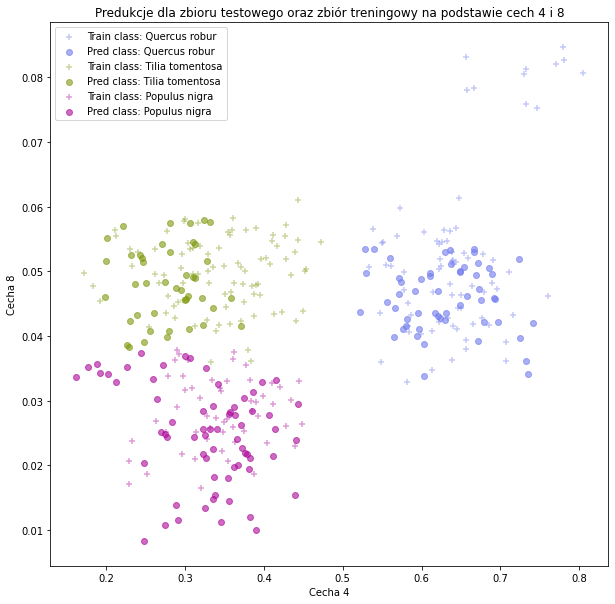

In [80]:
color = []
for i in range(41):
    color.append((random.randint(0,100)/100,random.randint(0,100)/100,random.randint(0,100)/100))

nazwy = {3: 'Populus nigra',
         5: 'Quercus robur',
         8: 'Nerium oleander',
         10:'Tilia tomentosa',
         13:'Corylus avellana'} 

plt.rcParams["figure.figsize"] = (10,10)

plt.title("Predukcje dla zbioru testowego oraz zbiór treningowy na podstawie cech 4 i 8")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")


for cl in classes:
    plt.scatter(x=new_train[new_train[:,0] == cl][:,features[0]],
                y=new_train[new_train[:,0] == cl][:,features[1]],
                label='Train class: '+nazwy[cl],
                marker ='+',
                c = color[cl],
                alpha=0.4)
    
    plt.scatter(x=classified_euc[classified_euc[:,0] == cl][:,features[0]],
                y=classified_euc[classified_euc[:,0] == cl][:,features[1]],
                label='Pred class: '+nazwy[cl],
                c = color[cl],
                alpha=0.6)
    
    
plt.legend()